# Data Dive
#### Author: Eric Englin
#### Date: 1/30/2025

Context: For the February Data Dive, three pairs of participants will be working with data from the FHWA Office of Realty. The dataset being used tracks residential and non-residential acquisition and relocation data submitted by State DOTs. The dataset is available in the folder   02-20-2025 for those interested in exploring themselves. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\Eric.Englin\Downloads\Uniform_Act_Statistics.csv")

In [3]:
df.head()

,State,Year,Line,Sum of Value
0,Alabama,1991,Total Number of Residential Displacements (Hou...,245.0
1,Alabama,1992,Total Number of Residential Displacements (Hou...,116.0
2,Alabama,1993,Total Number of Residential Displacements (Hou...,116.0
3,Alabama,1994,Total Number of Residential Displacements (Hou...,104.0
4,Alabama,1995,Total Number of Residential Displacements (Hou...,203.0


In [4]:
df.shape

(20397, 4)

In [5]:
len(df.State.unique())

56

In [8]:
len(df.Year.unique()), df.Year.min(), df.Year.max()

(34, 1991, 2024)

In [9]:
df.Year.value_counts()

Year
2020    728
2019    728
2023    728
2024    728
2022    715
2017    702
1991    676
2002    676
1992    676
2003    676
2021    676
2001    676
1995    676
1993    676
1999    676
1998    676
1997    676
1996    676
1994    676
2000    676
2018    663
2014    611
2016    611
2013    507
2012    494
2005    494
2015    468
2010    468
2011    455
2009    442
2004    416
2007    377
2006    325
2008    273
Name: count, dtype: int64

In [10]:
df.value_counts()

Line
Total Number of Residential Displacements (Households)                1569
Total Number of Relocation Appeals (Residential & Non-Residential)    1569
Total Number of Non-Residential Displacements                         1569
Residential Moving Payments (Total Costs)                             1569
Replacement Housing Payments (Total Costs)                            1569
Parcels Acquired by Condemnation                                      1569
Parcels Acquired By Administrative Settlement                         1569
Parcels Acquired                                                      1569
Number of Tenants Converted to Homeowners                             1569
Number of Last Resort Displacements                                   1569
Non-Residential Re-establishment Payments - Total Costs               1569
Non-Residential Moving Payments - Total Costs                         1569
Compensation - Total Costs                                            1569
Name: count, dtype: 

## Group Data

1. Create grouping by year and state. Sum the values to group multiple acquisitions happening per state per year.
2. Create grouping by year. Sum values across all states to create yearly trends. 

In [60]:
df_grouped = df.groupby(by=['Year',"State", "Line"]).sum().reset_index()
df_grouped_year = df.groupby(by=['Year', "Line"]).sum().reset_index()

#filter yearly data for parcel acquisition columns
df_grouped_year_parcels = df_grouped_year.loc[df_grouped_year['Line']=="Parcels Acquired"]
df_grouped_year_parcels_condemn = df_grouped_year.loc[df_grouped_year['Line']=="Parcels Acquired by Condemnation"]
df_grouped_year_parcels_admin = df_grouped_year.loc[df_grouped_year['Line']=="Parcels Acquired By Administrative Settlement"]

#filter state + year data for parcel acquisition columns
df_grouped_parcels = df_grouped.loc[df_grouped['Line']=="Parcels Acquired"]
df_grouped_parcels_condemn = df_grouped.loc[df_grouped['Line']=="Parcels Acquired by Condemnation"]
df_grouped_parcels_admin = df_grouped.loc[df_grouped['Line']=="Parcels Acquired By Administrative Settlement"]

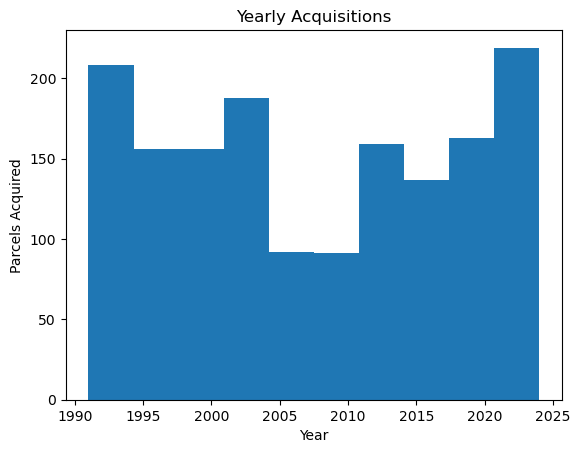

In [61]:
# Create the histogram for yearly data
df_grouped_hist = df_grouped.loc[df_grouped['Line']=="Parcels Acquired"]
plt.hist(df_grouped_hist.Year)
plt.xlabel('Year')
plt.ylabel('Parcels Acquired')
plt.title('Yearly Acquisitions')
plt.show()


[]

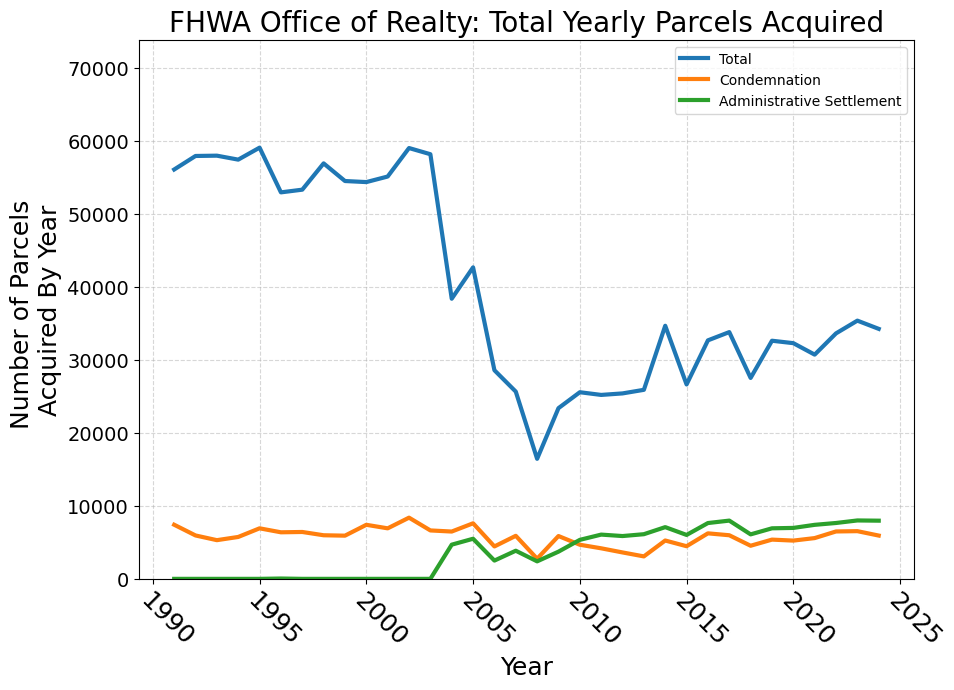

In [59]:
# Yearly acquisition data with separate lines for total, condemnation, and administrative settlement

# Adjusting the figure size
fig = plt.subplots(figsize=(10, 7))

# Creating a plot
plt.plot(df_grouped_year_parcels['Year'], df_grouped_year_parcels['Sum of Value'], linewidth=3, label = "Total")

plt.plot(df_grouped_year_parcels_condemn['Year'], df_grouped_year_parcels_condemn['Sum of Value'], linewidth=3, label = "Condemnation")
plt.plot(df_grouped_year_parcels_admin['Year'], df_grouped_year_parcels_admin['Sum of Value'], linewidth=3, label = "Administrative Settlement")

#for i, j in zip(df_grouped_year_parcels['Year'], df_grouped_year_parcels['Sum of Value']):
#    plt.text(i, j+1.5, f'{j}', ha='center', va='bottom', fontsize = 16)


# Adding a plot title and customizing its font size
plt.title('FHWA Office of Realty: Total Yearly Parcels Acquired', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Parcels \nAcquired By Year', fontsize=18)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=-45, fontsize=18, ha='left', rotation_mode="anchor")
plt.yticks(fontsize=14)
plt.ylim([0,max(df_grouped_year_parcels['Sum of Value'])*1.25])
plt.grid(True, linestyle='--', alpha=0.5) 
plt.legend()

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
#plt.xlim(pd.Timestamp('2023-09-1'), pd.Timestamp('2024-02-15'))
plt.plot()


### State-level analysis

- Rank each state by year to see which ones are acquiring the most parcels each year
- Identify trends over time to see if some states are changing their acquisition rates over time

In [104]:
df_grouped_parcels_1995 = df_grouped_parcels.loc[df_grouped_parcels["Year"]==1995][["State", "Sum of Value"]]
df_grouped_parcels_2000 = df_grouped_parcels.loc[df_grouped_parcels["Year"]==2000][["State", "Sum of Value"]]
df_grouped_parcels_2005 = df_grouped_parcels.loc[df_grouped_parcels["Year"]==2005][["State", "Sum of Value"]]
df_grouped_parcels_2010 = df_grouped_parcels.loc[df_grouped_parcels["Year"]==2010][["State", "Sum of Value"]]
df_grouped_parcels_2015 = df_grouped_parcels.loc[df_grouped_parcels["Year"]==2015][["State", "Sum of Value"]]
df_grouped_parcels_2020 = df_grouped_parcels.loc[df_grouped_parcels["Year"]==2020][["State", "Sum of Value"]]

df_grouped_parcels_1995['1995']= df_grouped_parcels_1995['Sum of Value'].rank(ascending = False)
df_grouped_parcels_1995 = df_grouped_parcels_1995.drop('Sum of Value', axis=1)
df_grouped_parcels_2000['2000']= df_grouped_parcels_2000['Sum of Value'].rank(ascending = False)
df_grouped_parcels_2000 = df_grouped_parcels_2000.drop('Sum of Value', axis=1)
df_grouped_parcels_2005['2005']= df_grouped_parcels_2005['Sum of Value'].rank(ascending = False)
df_grouped_parcels_2005 = df_grouped_parcels_2005.drop('Sum of Value', axis=1)
df_grouped_parcels_2010['2010']= df_grouped_parcels_2010['Sum of Value'].rank(ascending = False)
df_grouped_parcels_2010 = df_grouped_parcels_2010.drop('Sum of Value', axis=1)
df_grouped_parcels_2015['2015']= df_grouped_parcels_2015['Sum of Value'].rank(ascending = False)
df_grouped_parcels_2015= df_grouped_parcels_2015.drop('Sum of Value', axis=1)
df_grouped_parcels_2020['2020']= df_grouped_parcels_2020['Sum of Value'].rank(ascending = False)
df_grouped_parcels_2020 = df_grouped_parcels_2020.drop('Sum of Value', axis=1)

print(len(df_grouped_parcels_1995), 
      len(df_grouped_parcels_2000), 
      len(df_grouped_parcels_2005),
      len(df_grouped_parcels_2010), 
      len(df_grouped_parcels_2015),
      len(df_grouped_parcels_2020))
      

df_grouped_parcels_merged = pd.merge(df_grouped_parcels_1995, df_grouped_parcels_2000, on='State', how = 'outer')
df_grouped_parcels_merged = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2005, on='State', how = 'outer')
df_grouped_parcels_merged = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2010, on='State', how = 'outer')
df_grouped_parcels_merged = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2015, on='State', how = 'outer')
df_grouped_parcels_merged_outer = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2020, on='State', how = 'outer')


df_grouped_parcels_merged = pd.merge(df_grouped_parcels_1995, df_grouped_parcels_2000, on='State')
df_grouped_parcels_merged = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2005, on='State')
df_grouped_parcels_merged = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2010, on='State')
df_grouped_parcels_merged = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2015, on='State')
df_grouped_parcels_merged_inner = pd.merge(df_grouped_parcels_merged, df_grouped_parcels_2020, on='State')


df_grouped_parcels_merged_first_last = pd.merge(df_grouped_parcels_1995, df_grouped_parcels_2020, on='State', how = 'outer')



52 52 38 36 36 56


In [106]:
df_grouped_parcels_merged_first_last.sort_values('1995')

,State,1995,2020
5,California,1.0,14.0
54,Wisconsin,2.0,12.0
16,Illinois,3.0,6.0
36,North Carolina,4.0,1.0
11,Florida,5.0,22.0
51,Virginia,6.0,18.0
38,Ohio,7.0,3.0
39,Oklahoma,8.0,10.0
17,Indiana,9.0,9.0
12,Georgia,10.0,19.0


In [112]:
df_grouped_parcels_merged_inner = df_grouped_parcels_merged_inner.sort_values('1995')[0:10]

df_grouped_parcels_merged_inner['1995'] = df_grouped_parcels_merged_inner['1995'].rank()
df_grouped_parcels_merged_inner['2000'] = df_grouped_parcels_merged_inner['2000'].rank()
df_grouped_parcels_merged_inner['2005'] = df_grouped_parcels_merged_inner['2005'].rank()
df_grouped_parcels_merged_inner['2010'] = df_grouped_parcels_merged_inner['2010'].rank()
df_grouped_parcels_merged_inner['2015'] = df_grouped_parcels_merged_inner['2015'].rank()
df_grouped_parcels_merged_inner['2020'] = df_grouped_parcels_merged_inner['2020'].rank()
df_grouped_parcels_merged_inner

,State,1995,2000,2005,2010,2015,2020
17,Wisconsin,1.0,4.0,2.0,3.0,2.0,4.0
4,Florida,2.0,6.0,8.0,9.0,3.0,7.0
12,Ohio,3.0,8.0,3.0,1.0,1.0,2.0
6,Indiana,4.0,3.0,1.0,2.0,5.0,3.0
14,Texas,5.0,2.0,4.0,4.0,4.0,1.0
1,Arkansas,6.0,5.0,6.0,5.0,6.0,8.0
9,Louisiana,7.0,9.0,10.0,10.0,10.0,10.0
16,Washington,8.0,10.0,7.0,8.0,9.0,5.0
7,Kansas,9.0,7.0,9.0,7.0,8.0,6.0
13,South Carolina,10.0,1.0,5.0,6.0,7.0,9.0


<Axes: xlabel='State'>

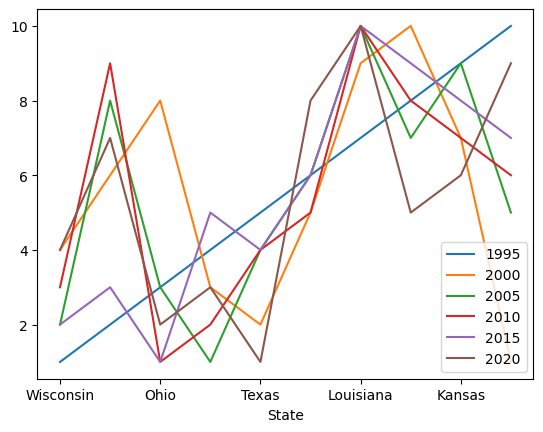

In [115]:
#under construction
df_grouped_parcels_merged_inner.set_index('State').plot()

In [ ]:
import matplotlib.pyplot as plt
for i, j in df.groupby("source"):
    plt.plot("ed_name", "rank", "o-", data=j, mfc="w")
plt.ylim(0.5, 0.5 + n_top_ranked)
plt.gca().invert_yaxis()


In [ ]:
import matplotlib.pyplot as plt
for i, j in df.groupby("source"):
    plt.plot("ed_name", "rank", "o-", data=j, mfc="w")
plt.ylim(0.5, 0.5 + n_top_ranked)
plt.gca().invert_yaxis()


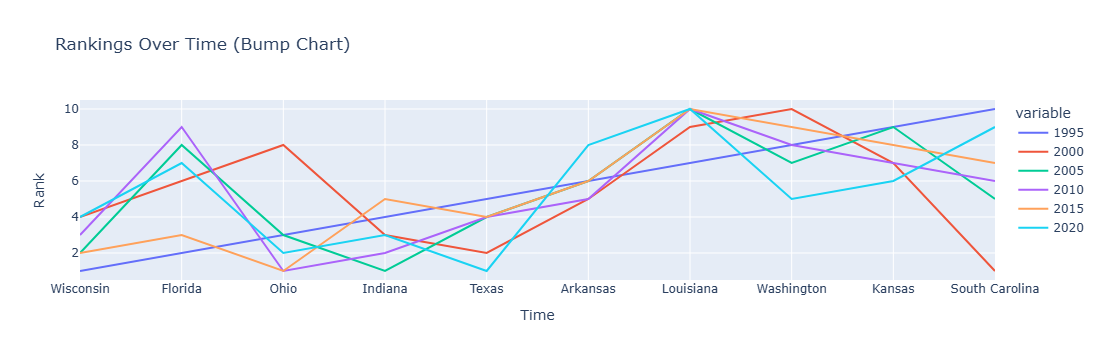

In [113]:
import plotly.express as px
import pandas as pd

# Sample data (same as above)

# Plotting
fig = px.line(df_grouped_parcels_merged_inner, x='State', y=['1995', '2000', '2005', '2010', '2015', '2020'],
              title='Rankings Over Time (Bump Chart)')
fig.update_layout(yaxis_title='Rank', xaxis_title='Time')
fig.show()
